In [1]:
import sys
sys.path.append('../')
from megaparse.cdp.utils.diff_agent import DifferenceAgent, ContextType
from megaparse.cdp.utils.query_engine import get_query_engine
from pathlib import Path
from megaparse.cdp.utils.question_generator import QuestionGenerator

In [2]:
query_engine = get_query_engine(Path("../megaparse/cdp/CDP_QUAL_CHART_01_CHARTE_PRODUITS.md"))
question_generator = QuestionGenerator()

In [3]:
agent = DifferenceAgent(query_engine, document_context= None, question_generator=question_generator)


In [4]:
questions = agent.generate_questions(Path("../megaparse/cdp/exemple_fournisseur.xlsx"), tab_name = 'Fiche recette', language_verification= True)

Generating Questions ...
Verifying language and translating questions ...


In [5]:
len(questions)

35

In [ ]:
# additional_context = ContextType(category='Entree de Gamme', context='pour les produits de la catégorie Entree de Gamme ?')
# agent.run(additional_context=additional_context, verbose=True)

Querying generated questions to the reference document...


100%|██████████| 35/35 [02:04<00:00,  3.56s/it]


sucre -> no_match
poudre de lait entier -> no_match
beurre de cacao -> no_match
e 415 -> no_match
lait entier uht -> no_match
amidon de bl -> no_match
farine de bl -> no_match
huile de tournesol -> no_match
jaune doeufs issus dlevage ponte au sol -> no_match
pte de pistache -> no_match
List of errors by category : 

Errors for Entree de Gamme:

Errors for Coeur de Gamme:
sucre: 1 errors
poudre de lait entier: 1 errors
beurre de cacao: 1 errors
e 415: 1 errors
lait entier uht: 1 errors
amidon de bl: 1 errors
farine de bl: 1 errors
huile de tournesol: 1 errors
jaune doeufs issus dlevage ponte au sol: 1 errors
glatine bovine: 1 errors
pte de pistache: 1 errors

Errors for Haut de Gamme:

Metrics for Coeur de Gamme.0:


/Users/chloed./.local/share/virtualenvs/MegaParse-onLGVT8Y/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


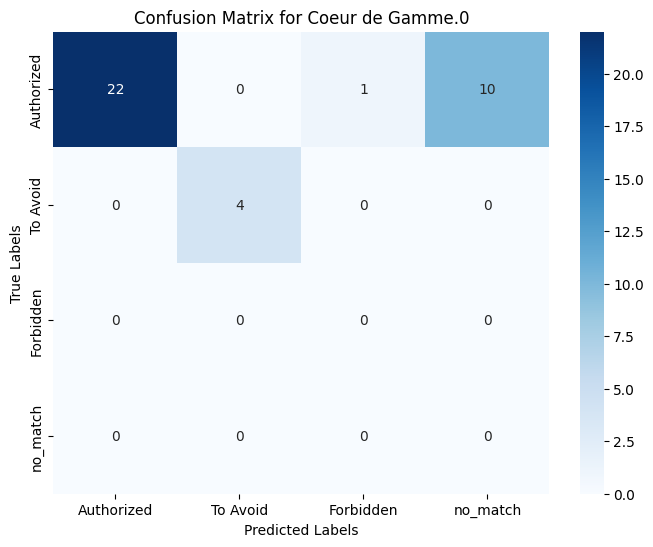

Accuracy: 70.27%
            Precision    Recall
Authorized        1.0  0.666667
To Avoid          1.0  1.000000
Forbidden         0.0  0.000000
no_match          0.0  0.000000


In [6]:
additional_contexts = [
                        ContextType(category='Coeur de Gamme', context='pour les produits de la catégorie Coeur de Gamme ?')
                        # ContextType(category='Entree de Gamme', context='pour les produits de la catégorie Entree de Gamme ?'),
                        # ContextType(category='Haut de Gamme', context='pour les produits de la catégorie Haut de Gamme ?')
                        ]
generated_df = agent.evaluate(source_path= None, target_path= Path('../megaparse/cdp/ground_truth.csv'), tab_name= None, additional_contexts=additional_contexts, verbose=True, compute_all=False)


In [7]:
agent.generated_df

,name,Coeur de Gamme.0,Coeur de Gamme.0.detail,cleaned_name
0,Framboise,Authorized,La framboise est un fruit naturel qui ne conti...,framboise
1,Eau,Authorized,L'eau est un ingrédient de base et ne contient...,eau
2,Sucre cristal,Authorized,Le sucre cristal est une forme de sucre granul...,sucre cristal
3,Sirop de glucose,To Avoid,Le sirop de glucose est un ingrédient couramme...,sirop de glucose
4,Huile de palmiste,To Avoid,L'huile de palmiste non certifiée RSPO est int...,huile de palmiste
5,E472a (esters d'acide acétique de mono- et dig...,To Avoid,Les esters d'acide acétique de mono- et diglyc...,e472a esters dacide actique de mono et diglycr...
6,Protéine de lait,Authorized,La protéine de lait est autorisée dans les pro...,protine de lait
7,Crème de lait,Authorized,La crème de lait est un produit laitier obtenu...,crme de lait
8,E407,To Avoid,"Le E407, également connu sous le nom de carrag...",e407
9,Gélatine bovine,Forbidden,La gélatine bovine est interdite dans les prod...,glatine bovine


In [8]:
agent.mapping

{'crme de lait': 'crme de lait',
 'framboise': 'framboise',
 'sucre': 'no_match',
 'oeufs entier issus dlevage en ponte au sol': 'ufs issus de poules leves au sol',
 'poudre de lait entier': 'no_match',
 'beurre de cacao': 'no_match',
 'lcithine de soja e322': 'e322 soja',
 'arme naturel de vanille': 'arme naturel de vanille',
 'sirop de glucose': 'sirop de glucose',
 'eau': 'eau',
 'e 406': 'e406',
 'e 440': 'glifiant e440ii',
 'e 466': 'e466',
 'e 415': 'no_match',
 'e 330': 'e330',
 'e 202': 'conservateur e202',
 'lait entier uht': 'no_match',
 'amidon de bl': 'no_match',
 'farine de bl': 'no_match',
 'huile de tournesol': 'no_match',
 'beurre concentr': 'beurre concentr',
 'lait crm en poudre': 'lait crm en poudre',
 'malt dorge': 'malt dorge',
 'jaune doeufs issus dlevage ponte au sol': 'no_match',
 'glatine bovine': 'glatine bovine',
 'e 472a': 'e472a esters dacide actique de mono et diglycrides dacides gras',
 'pte de pistache': 'no_match',
 'hydrolysat de protines de lait': 'hy